## Pre Explanation

group company_size, experience to small, medium, large; junior, senior, expert 
and try different encoder on all the categorical variable.

## Imports & Setup

In [8]:
import os
import pandas as pd
# import datetime
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import numpy as np
# from scipy import stats
# import random
import category_encoders as ce
from category_encoders import LeaveOneOutEncoder, TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import model_selection

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import xgboost as xgb
#from catboost import CatBoostClassifier
import lightgbm as lgb

import time
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [9]:
print(os.getcwd())
os.chdir('/Users/liuyang/Desktop/Springboard_Capstone') 
print(os.getcwd())

/Users/liuyang/Desktop/Springboard_Capstone
/Users/liuyang/Desktop/Springboard_Capstone


In [10]:
df = pd.read_csv('data/train.csv')

In [11]:
df.shape

(18359, 14)

In [12]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [13]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

In [18]:
df.gender.mode()[0]

'Male'

In [7]:
def fill_na(data):
    for i in data.columns:
        data[i].fillna(data[i].mode()[0],inplace=True)
        
        
fill_na(df)

In [290]:
df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [291]:
df.city.value_counts()

city_103    4358
city_21     1672
city_16     1654
city_114    1472
city_160     827
            ... 
city_121       3
city_111       3
city_129       3
city_171       2
city_140       1
Name: city, Length: 123, dtype: int64

In [292]:
df.city = df.city.map(lambda x: 'others' if df[df['city']==x].count()[0] < 50 else x)

In [293]:
#df.city.value_counts()

In [294]:
df.company_size = df.company_size.map(lambda x: 'small' if x in ['<10','10/49','50-99'] else 'medium' if x in['100-500', '500-999'] else 'large')

In [295]:
df.company_size.value_counts()

small     10725
large      4034
medium     3600
Name: company_size, dtype: int64

In [296]:
df.experience = df.experience .map(lambda x: 'junior' if x in ['<1', '1', '2','3', '4','5'] else 'senior' if x in ['6','7','8','9','10'] else 'expert')

In [297]:
df.experience.value_counts()

expert    8005
junior    5578
senior    4776
Name: experience, dtype: int64

In [323]:
df.major_discipline.value_counts()

1    16576
2     1783
Name: major_discipline, dtype: int64

In [298]:
df = df.drop('enrollee_id',axis=1)

In [299]:
cat_col = df.select_dtypes(include=['object']).columns.tolist()

In [300]:
df = pd.get_dummies(df,columns=cat_col)
df.head()

,city_development_index,training_hours,target,city_city_10,city_city_100,city_city_102,city_city_103,city_city_104,city_city_105,city_city_11,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,0.689,106,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,0.923,69,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.910,4,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0.666,26,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.887,88,1,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [267]:
df.columns

Index(['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target'],
      dtype='object')

In [301]:
df.shape

(18359, 93)

In [302]:
X = df.drop(['target'],axis=1)
y = df['target']

In [270]:
# enc =ce.WOEEncoder(cols=cat_col)
# X_enc = enc.fit_transform(X,y)
# X_enc.head()

In [271]:
# enc = TargetEncoder(cols=cat_col)
# X_enc = enc.fit_transform(X,y)
# X_enc.head()

In [272]:
enc = LeaveOneOutEncoder(cols=cat_col)
X_enc = enc.fit_transform(X,y)
X_enc.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.125000,0.689,0.130558,0.117249,0.117429,0.141915,0.133394,0.173211,0.106974,0.133541,0.137149,106
1,0.099291,0.923,0.130558,0.117249,0.117429,0.141915,0.133394,0.105322,0.146028,0.092575,0.137149,69
2,0.093164,0.910,0.130558,0.117249,0.117429,0.141915,0.133394,0.129005,0.146028,0.152764,0.137262,4
3,0.101695,0.666,0.130558,0.117249,0.117429,0.141915,0.133394,0.105322,0.146028,0.133541,0.137149,26
4,0.159259,0.887,0.130499,0.174297,0.117357,0.118573,0.133333,0.128796,0.145934,0.133475,0.136909,88


In [273]:
df = pd.concat([X_enc,y],axis=1)

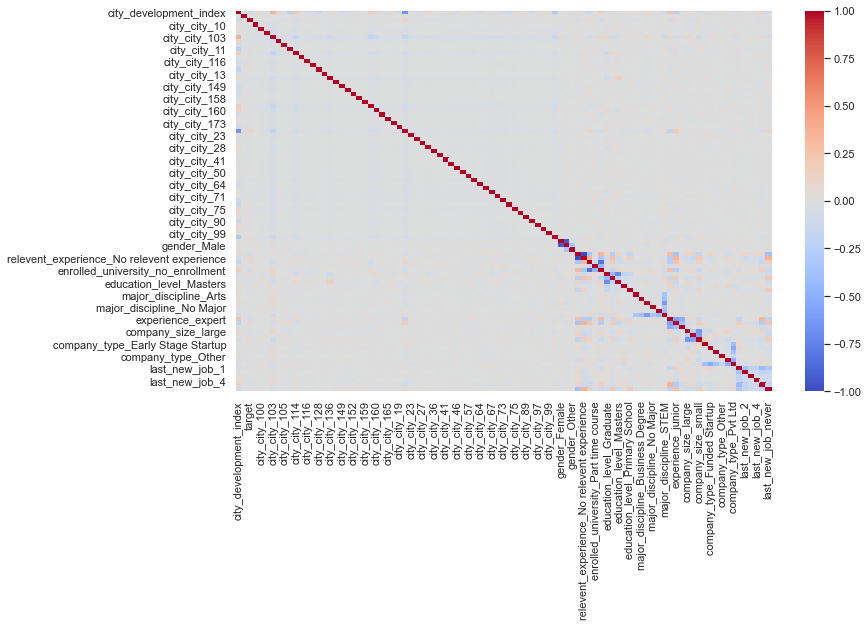

In [304]:
_= plt.subplots(figsize=(12,7))
sns.heatmap(df.corr(),cmap='coolwarm') 
plt.show()

In [305]:
X = df.drop(['target'],axis=1)
y = df['target'].ravel()

In [306]:
X_scaled = StandardScaler().fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X_scaled, y, test_size=0.30, stratify=y, random_state=43)

In [277]:
np.unique(y_test,return_counts=True)

(array([0, 1]), array([4780,  728]))

In [307]:
index = ['LR','GNB','KNN','SVC','DT','RF','GB','XGB','LightGB']
models = [LogisticRegression(),
          GaussianNB(),
          KNeighborsClassifier(),
          SVC(probability=True, random_state=43),
          DecisionTreeClassifier(random_state=43),
          RandomForestClassifier(random_state=43),
          GradientBoostingClassifier(random_state=43),
          XGBClassifier(random_state=43),
          lgb.LGBMClassifier(objective='binary',random_state=43)]

    # combine index and models to a dictionary
model_dict = dict(zip(index,models))

In [308]:
def model_eval(model_name, X, y, n):
    scoring = {
           'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score, needs_proba=True)}

    kfold = KFold(n_splits=n)
    model = model_name

    model_res = model_selection.cross_validate(
                                          estimator=model,
                                          X=X,
                                          y=y,
                                          cv=kfold,
                                          scoring=scoring)
    
    return pd.DataFrame(model_res).round(3)

In [309]:
def allmodel_perform(X, y, n):
    # create a empty list to put the average model test_score from the validation
    model_score_average = []
    
    # Loop inside the model_dict and average the test_score. (test_score contains: accuracy, precision, recall, fscore, roc_auc_score)
    # Append the avarage score to list 'model_score_average' 
    for model in model_dict.values():
        model_score_average.append(model_eval(model,X,y,n).mean())


    # put the model_score_average into a dataframe 
    df_model_eval = pd.DataFrame(model_score_average,index=list(model_dict.keys())).round(5)
    df_model_eval = df_model_eval.reset_index().rename(columns={'index':'model'})
    return df_model_eval

In [310]:
model_res = allmodel_perform(X_train, y_train, 5)
model_res

/Users/liuyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/liuyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/liuyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/liuyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_cl

,model,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1_score,test_roc_auc
0,LR,0.0394,0.0086,0.8678,0.2000,0.0006,0.0010,0.6458
1,GNB,0.0156,0.0116,0.5988,0.1844,0.5900,0.2804,0.6124
2,KNN,0.1598,4.5290,0.8508,0.2394,0.0600,0.0956,0.5700
3,SVC,42.7480,1.9730,0.8678,0.0000,0.0000,0.0000,0.5398
4,DT,0.0778,0.0060,0.7756,0.1750,0.1890,0.1814,0.5292
5,RF,1.0896,0.1150,0.8424,0.2152,0.0726,0.1084,0.5900
6,GB,1.9088,0.0122,0.8674,0.3728,0.0064,0.0126,0.6422
7,XGB,1.1820,0.0166,0.8612,0.2382,0.0238,0.0434,0.6128
8,LightGB,0.1726,0.0132,0.8658,0.2628,0.0094,0.0180,0.6258


In [238]:
def model_eval_os(model_name, n):
    
    precisions = []
    recalls = []
    f1scores = []
    aucs = []
    roc_aucs=[]
    y_proba = []
    y_pred = []
    
    cv = KFold(n_splits=n)
    for i, (train, test) in enumerate(cv.split(X_train, y_train)):
        X_train_fold, y_train_fold = X_train[train], y_train[train]
        X_test_fold, y_test_fold = X_train[test], y_train[test]
        
        os = SMOTE(random_state=43)
        X_train_oversampled, y_train_oversampled = os.fit_sample(X_train_fold, y_train_fold)
        model = model_name
        
        model.fit(X_train_oversampled, y_train_oversampled)
        
        y_pred = model.predict(X_test_fold)
        y_pred_proba = model.predict_proba(X_test_fold)[:,1]
        
       
        recalls.append(recall_score(y_test_fold, y_pred, pos_label=1,average='binary'))
        precisions.append(precision_score(y_test_fold, y_pred, pos_label=1,average='binary'))
        f1scores.append(f1_score(y_test_fold, y_pred, pos_label=1,average='binary'))
        roc_aucs.append(roc_auc_score(y_test_fold, y_pred_proba))
        aucs.append(model.score(X_test_fold, y_test_fold))
        y_proba.append(y_pred_proba)
    
    res = pd.DataFrame([precisions,recalls,f1scores,aucs,roc_aucs]).T
    res.columns = ['test_precison', 'test_recall', 'test_f1score', 'test_accuracy', 'test_roc_auc']
    return res

In [ ]:
def allmodel_perform_os(n):

    model_score_average = []

    for model in model_dict.values():
        model_score_average.append(model_eval_os(model,n).mean())

    df_model_eval = pd.DataFrame(model_score_average,index=list(model_dict.keys())).round(5)
    df_model_eval = df_model_eval.reset_index().rename(columns={'index':'model'})
    return df_model_eval

In [ ]:
model_res_os = allmodel_perform_os(5)
model_res_os

In [318]:
model = GaussianNB(var_smoothing = 5)
cv = KFold(n_splits=5)


for i, (train, test) in enumerate(cv.split(X_train)):
        X_train_fold, y_train_fold = X_train[train], y_train[train]
        X_test_fold, y_test_fold = X_train[test], y_train[test]
        
        os = SMOTE(random_state=43)
        X_train_oversampled, y_train_oversampled = os.fit_sample(X_train_fold, y_train_fold)
        #model = RandomForestClassifier(random_state=43)
        
        model.fit(X_train_oversampled, y_train_oversampled)
        y_pred = model.predict(X_test_fold)
        y_pred_prob = model.predict_proba(X_test_fold)[:,1]
        #precision, recall, f1score, support = score(y_test_fold, y_pred, pos_label=1,average='binary')
        
        
yfinal = model.predict(X_test)
yfinal_proba = model.predict_proba(X_test)[:,1]
precision, recall, f1score, support = score(y_test, yfinal, pos_label=1,average='binary')

print('precision:', round(precision,3), 'recall:', round(recall,3), 'f1score:', round(f1score,3))
print('roc_auc:', round(roc_auc_score(y_test, yfinal_proba),3))

precision: 0.134 recall: 0.973 f1score: 0.235
roc_auc: 0.616


In [282]:
model = lgb.LGBMClassifier(objective='binary',random_state=43)
cv = KFold(n_splits=5)


for i, (train, test) in enumerate(cv.split(X_train)):
        X_train_fold, y_train_fold = X_train[train], y_train[train]
        X_test_fold, y_test_fold = X_train[test], y_train[test]
        
        os = SMOTE(random_state=43)
        X_train_oversampled, y_train_oversampled = os.fit_sample(X_train_fold, y_train_fold)
        #model = RandomForestClassifier(random_state=43)
        
        model.fit(X_train_oversampled, y_train_oversampled)
        y_pred = model.predict(X_test_fold)
        y_pred_prob = model.predict_proba(X_test_fold)[:,1]
        #precision, recall, f1score, support = score(y_test_fold, y_pred, pos_label=1,average='binary')
        
        
yfinal = model.predict(X_test)
yfinal_proba = model.predict_proba(X_test)[:,1]
precision, recall, f1score, support = score(y_test, yfinal, pos_label=1,average='binary')

print('precision:', round(precision,3), 'recall:', round(recall,3), 'f1score:', round(f1score,3))
print('roc_auc:', round(roc_auc_score(y_test, yfinal_proba),3))

precision: 1.0 recall: 1.0 f1score: 1.0
roc_auc: 1.0


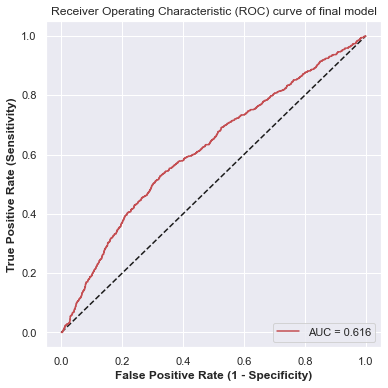

In [319]:
fpr,tpr,threshold = roc_curve(y_test,model.predict_proba(X_test)[:,1])
roc_auc_ = metrics.auc(fpr,tpr)
plt.figure(figsize=(6,6))
_=plt.plot([0,1],[0,1],'k--')
_=plt.plot(fpr,tpr,'r',label='AUC = %.3f'%roc_auc_)
_=plt.title('Receiver Operating Characteristic (ROC) curve of final model')
_=plt.xlabel('False Positive Rate (1 - Specificity)',fontsize=12,fontweight='bold')
_=plt.ylabel('True Positive Rate (Sensitivity)',fontsize=12,fontweight='bold')
_=plt.legend(loc='lower right')

In [371]:
model = LogisticRegression(C=100)
cv = KFold(n_splits=5)


for i, (train, test) in enumerate(cv.split(X_train)):
        X_train_fold, y_train_fold = X_train[train], y_train[train]
        X_test_fold, y_test_fold = X_train[test], y_train[test]
        
        os = SMOTE(random_state=43)
        X_train_oversampled, y_train_oversampled = os.fit_sample(X_train_fold, y_train_fold)
        #model = RandomForestClassifier(random_state=43)
        
        model.fit(X_train_oversampled, y_train_oversampled)
        y_pred = model.predict(X_test_fold)
        y_pred_prob = model.predict_proba(X_test_fold)[:,1]
        #precision, recall, f1score, support = score(y_test_fold, y_pred, pos_label=1,average='binary')
        
        
yfinal = model.predict(X_test)
yfinal_proba = model.predict_proba(X_test)[:,1]
precision, recall, f1score, support = score(y_test, yfinal, pos_label=1,average='binary')

print('precision:', round(precision,3), 'recall:', round(recall,3), 'f1score:', round(f1score,3))
print('roc_auc:', round(roc_auc_score(y_test, yfinal_proba),3))

precision: 0.19 recall: 0.534 f1score: 0.28
roc_auc: 0.623


### Here

In [316]:
from sklearn.model_selection import GridSearchCV
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     verbose=1, 
                     scoring='recall')

gs_NB.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.1s finished


GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3101297...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='recall', verbose=1)

In [318]:
gs_NB.best_score_
gs_NB.best_params_

{'var_smoothing': 0.0015199110829529332}

In [343]:

yfinal = model.predict(X_test)
yfinal_proba = model.predict_proba(X_test)[:,1]
precision, recall, f1score, support = score(y_test, yfinal, pos_label=1,average='binary')

print('precision:', round(precision,3), 'recall:', round(recall,3), 'f1score:', round(f1score,3))
print('roc_auc:', round(roc_auc_score(y_test, yfinal_proba),3))

precision: 0.139 recall: 0.93 f1score: 0.242
roc_auc: 0.6


In [ ]:
# check the how many city we have in the dataset.
len(df.city.unique())

In [44]:
# dummy encode 'city' column and drop 'city' column in the original df together with 'city_development_index' due to multicollinearity
city_dummy = pd.get_dummies(df.city)

df = pd.concat([df.drop(['city','city_development_index'],axis=1),city_dummy], axis=1)

In [ ]:
# df columns increased from 13 to 59. (13 + 48 -2)
df.shape

In [ ]:
df.head()

In [ ]:
# plot heatmap make sure no more multicollinearity exists 

_= plt.subplots(figsize=(12,7))
sns.heatmap(df.corr(),cmap='coolwarm') 
plt.show()

In [45]:
X = df.drop(['target'],axis=1)
y = df['target'].ravel()

## Encode 'city' column via LeaveOneOutEncoder

In [46]:
# Scale X 
X_scaled = StandardScaler().fit_transform(X)

In [47]:
# Split train test set
X_train,X_test,y_train,y_test = train_test_split(X_scaled, y, test_size=0.30, stratify=y, random_state=43)

In [ ]:
# Confirm there's positive class in the test set.
np.unique(y_test,return_counts=True)

In [ ]:
# Check how imbalanced the data is in y_train.
np.unique(y_train, return_counts=True)[1][0]/np.unique(y_train, return_counts=True)[1][1]

we can see in our y_train, the ratio between negative and positive classes are 6.6 : 1 
This class imbalance may cause some negative effect when we train the model.
As our models look at the data and cleverly decide that the best thing to do is to always predict negative class and achieve high accuracy.
If that happens we will normally get high accuracy but low recall or sometimes even zero recall, precision as the model will only predict negative class.

## Train Models with Defaul Settings

### Select Models

In [ ]:
index = ['LR','GNB','KNN','SVC','DT','RF','GB','XGB','LightGB']
models = [LogisticRegression(),
          GaussianNB(),
          KNeighborsClassifier(),
          SVC(probability=True, random_state=43),
          DecisionTreeClassifier(random_state=43),
          RandomForestClassifier(random_state=43),
          GradientBoostingClassifier(random_state=43),
          XGBClassifier(random_state=43),
          lgb.LGBMClassifier(objective='binary',random_state=43)]

    # combine index and models to a dictionary
model_dict = dict(zip(index,models))

In [ ]:
# cv before oversampling

def model_eval(model_name, X, y, n):
    scoring = {
           'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
           'roc_auc' : make_scorer(roc_auc_score, needs_proba=True)}

    kfold = KFold(n_splits=n)
    model = model_name

    model_res = model_selection.cross_validate(
                                          estimator=model,
                                          X=X,
                                          y=y,
                                          cv=kfold,
                                          scoring=scoring)
    
    return pd.DataFrame(model_res).round(3)

In [ ]:
# create a function to collect all test scores for all the models before oversampling
def allmodel_perform(X, y, n):
    # create a empty list to put the average model test_score from the validation
    model_score_average = []
    
    # Loop inside the model_dict and average the test_score. (test_score contains: accuracy, precision, recall, fscore, roc_auc_score)
    # Append the avarage score to list 'model_score_average' 
    for model in model_dict.values():
        model_score_average.append(model_eval(model,X,y,n).mean())


    # put the model_score_average into a dataframe 
    df_model_eval = pd.DataFrame(model_score_average,index=list(model_dict.keys())).round(5)
    df_model_eval = df_model_eval.reset_index().rename(columns={'index':'model'})
    return df_model_eval

In [ ]:
# plot test result for all models
model_res = allmodel_perform(X_train, y_train, 5)
model_res

In [62]:
# oversampling inside cross validation train_fold

def model_eval_os(model_name, n):
    
    precisions = []
    recalls = []
    f1scores = []
    aucs = []
    roc_aucs=[]
    y_proba = []
    y_pred = []
    
    cv = KFold(n_splits=n)
    for i, (train, test) in enumerate(cv.split(X_train, y_train)):
        X_train_fold, y_train_fold = X_train[train], y_train[train]
        X_test_fold, y_test_fold = X_train[test], y_train[test]
        
        os = SMOTE(random_state=43)
        X_train_oversampled, y_train_oversampled = os.fit_sample(X_train_fold, y_train_fold)
        model = model_name
        
        model.fit(X_train_oversampled, y_train_oversampled)
        
        y_pred = model.predict(X_test_fold)
        y_pred_proba = model.predict_proba(X_test_fold)[:,1]
        
       
        recalls.append(recall_score(y_test_fold, y_pred, pos_label=1,average='binary'))
        precisions.append(precision_score(y_test_fold, y_pred, pos_label=1,average='binary'))
        f1scores.append(f1_score(y_test_fold, y_pred, pos_label=1,average='binary'))
        roc_aucs.append(roc_auc_score(y_test_fold, y_pred_proba))
        aucs.append(model.score(X_test_fold, y_test_fold))
        y_proba.append(y_pred_proba)
    
    res = pd.DataFrame([precisions,recalls,f1scores,aucs,roc_aucs]).T
    res.columns = ['test_precison', 'test_recall', 'test_f1score', 'test_accuracy', 'test_roc_auc']
    return res
    

In [ ]:
def allmodel_perform_os(n):

    model_score_average = []

    for model in model_dict.values():
        model_score_average.append(model_eval_os(model,n).mean())

    df_model_eval = pd.DataFrame(model_score_average,index=list(model_dict.keys())).round(5)
    df_model_eval = df_model_eval.reset_index().rename(columns={'index':'model'})
    return df_model_eval

In [ ]:
# plot result after oversampling inside cv train dataset
model_res_os = allmodel_perform_os(5)
model_res_os

In [ ]:
# plot barh plot to check the average score of recall, fscore, accuracy, roc_auc from cross validation
fig,axs = plt.subplots(4,1, figsize=(6,12),sharex=True)

axs[0].barh('model', 'test_recall', data=model_res_os)
axs[1].barh('model', 'test_f1score', data=model_res_os)
axs[2].barh('model', 'test_accuracy', data=model_res_os)
axs[3].barh('model', 'test_roc_auc',data=model_res_os)

axs[0].set_xlabel('Recall')
axs[1].set_xlabel('F1score')
axs[2].set_xlabel('Accuracy')
axs[3].set_xlabel('ROC_AUC')


axs[0].plot([0.6,0.6],[-1,9],'r--')
axs[1].plot([0.6,0.6],[-1,9],'r--')
axs[2].plot([0.6,0.6],[-1,9],'r--')
axs[3].plot([0.6,0.6],[-1,9],'r--')
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance
model = GaussianNB()
model.fit(X_train, y_train)

imps = permutation_importance(model, X_train, y_train)
fig,ax = plt.subplots(figsize=(16,10))
plt.barh(df.drop('target',axis=1).columns.tolist(), abs(imps.importances_mean))

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
len(model.coef_[0])

fig,ax = plt.subplots(figsize=(16,10))
    
plt.barh(df.drop('target',axis=1).columns.tolist(), abs(model.coef_[0]))

Next, Check feature importance for model: DecisionTree, RandomForest, GB, XGB, LightGB 
As their test score outperformed the other 4 models.

In [ ]:
# feature importance for DecisionTree
model =  DecisionTreeClassifier(random_state=43)
model.fit(X_train,y_train)

fig,ax = plt.subplots(figsize=(16,10))
plt.barh(df.drop('target',axis=1).columns.tolist(), model.feature_importances_)

In [ ]:
# feature importance for RandomForest
model = RandomForestClassifier(random_state=43)
model.fit(X_train, y_train)
fig,ax = plt.subplots(figsize=(16,10))
plt.barh(df.drop('target',axis=1).columns.tolist(), model.feature_importances_)

In [ ]:
# feature importance for GB
model = GradientBoostingClassifier(random_state=43)
model.fit(X_train,y_train)

fig,ax = plt.subplots(figsize=(16,10))
plt.barh(df.drop('target',axis=1).columns.tolist(), model.feature_importances_)

In [ ]:
# feature importance for xgb
from xgboost import plot_importance
model = XGBClassifier(random_state=43)
model.fit(X_train,y_train)
fig,ax = plt.subplots(figsize=(16,10))
plot_importance(model,ax=ax)
plt.show()

In [ ]:
df.columns[9]

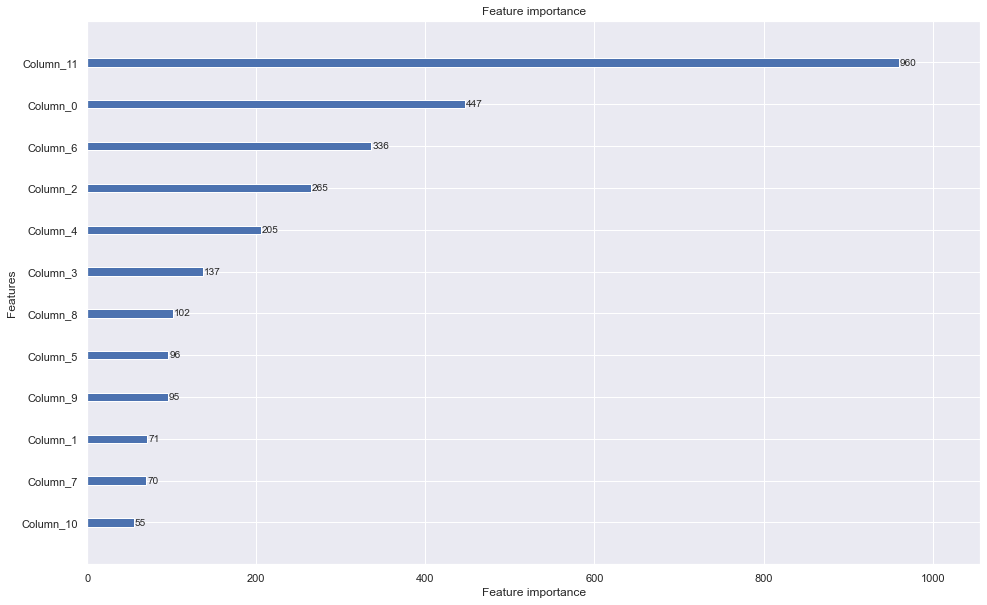

In [216]:
# # feature importance for lightgb
from lightgbm import plot_importance
model = lgb.LGBMClassifier(objective='binary',random_state=43)
model.fit(X_train,y_train)
fig, ax = plt.subplots(figsize=(16, 10))
plot_importance(model,ax=ax)
plt.show()

In [217]:
df.columns[11]

'training_hours'